# 5.3 기술 통계 계산과 요약

* `pandas` 객체는 일반적인 수학 메서드와 통계 메서드를 가지고 있음<br><br>
* 이 메서드의 대부분은 하나의 `Series`나 `DataFrame`의 로우나 컬럼에서<br>
단일 값(합이나 평균 같은)을 구하는 **축소** 혹은 **요약 통계** 범주에 속한다.<br><br>
* 순수 `Numpy` 배열에서 제공하는 동일한 메서드와 비교하여 `pandas`의 메서드는<br>
처음부터 누락된 데이터를 제외하도록 설계되었다.

In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                   columns=['one', 'two'])

In [3]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


---

* `DataFrame`의 `sum` 메서드를 호출하면 각 컬럼의 합을 담은 `Series`를 반환한다.

In [8]:
df_sum = df.sum() #default: axis=0
print(df_sum, type(df_sum))

one    9.25
two   -5.80
dtype: float64 <class 'pandas.core.series.Series'>


In [10]:
df.sum(axis='columns') #axis=1

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

---

* 전체 로우나 컬럼의 값이 `NA`가 아니라면 `NA`값은 제외되고 계산된다.<BR>
이는 `sikpna` 옵션으로 조정할 수 있다.

In [11]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [13]:
df.mean(axis='columns', skipna=True) #default: True

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

|옵션|설명|
|---|---|
|`axis`|연산을 수행할 축. DataFrame에서 0은 로우고 1은 컬럼이다.|
|`skipna`|누락된 값을 제외할 것인지 정하는 옵션. 기본값은 True|
|`level`|계산하려는 축이 계층적 색인(다중 색인)이라면 레벨에 따라 묶어서 계산한다.|

---

* `idxmin`이나 `ixmax` 같은 메서드는 최솟값 혹은 최댓값을 가지고 있는 색인값과 같은 간접 통계를 반환한다.

In [19]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [16]:
df.idxmax()

one    b
two    d
dtype: object

* 또다른 메서드로 **누산(accumulation)**이 있다.

In [17]:
df.cumsum() 

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


* 축소나 누산이 아닌 다른 종류의 메서드로 `describe`가 있다.<br>
이 메서드는 한 번에 여러 개의 통계 결과를 만들어낸다.

In [18]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


* 수치 데이터가 아닐 경우 `describe`는 다른 요약 통계를 생성한다.

In [21]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [22]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

|메서드|설명|
|---|---|
|`count`|NA 값을 제외한 값의 수를 반환한다.|
|`describe`|Series나 DataFrame의 각 컬럼에 대한 요약 통계를 계산한다.|
|`min, max`|최솟값과 최댓값을 계산한다.|
|`argmin, argmax`|각각 최솟값과 최댓값을 담고 있는 색인의 위치(정수)를 반환한다.|
|`idxmin, idxmax`|각각 최솟값과 최댓값을 담고 있는 색인의 값을 반환한다.|
|`quantile`|0부터 1까지의 분위수를 계산한다.|
|`sum`|합을 계산한다.|
|`mean`|평균을 계산한다.|
|`median`|중간값(50% 분위)을 반환한다.|
|`mad`|평균값에서 평균절대편차를 계산한다.|
|`prod`|모든 값의 곱|
|`var`|표본분산의 갑을 계산한다.|
|`std`|표본표준편차의 값을 계산한다.|
|`skew`|표본비대칭도(3차 적률)의 값을 계산한다.|
|`kurt`|표본 첨도(4차 적률)의 값을 계산한다.|
|`cumsum`|누적합을 계산한다.|
|`cummin, cummax`|각각 누적 최솟값과 누적 최댓값을 계산한다.|
|`cumprod`|누적곱을 계산한다.|
|`diff`|1차 산술차를 계산한다(시계열 데이터 처리시 유용)|
|`pct_change`|퍼센트 변화율을 계산한다.|

---

# 5.3.1 상관관계와 공분산

1. 공분산(Covariance)
- 임의의 두 확률변수 X, Y 사이의 선형관계에 대한 정보를 알려주는 것.<br>
* $Cov(X, Y) > 0$: 두 확률변수는 서로 양의 선형 관계가 있다.
* $Cov(X, Y) < 0$: 두 확률 변수는 서로 음의 선형 관계가 있다.
* $Cov(X, Y) = 0$ : 두 확률 변수는 아무런 선형 관계가 없다.<br><br>

2. 상관계수(Cofficient of Correlation)
- 상관 정도의 절대적인 크기를 측정할 수 있도록 해주는 것

    * 1에 가까울수록 두 확률변수가 양의 선형관계를 갖는다
    * -1에 가까울수록 두 확률변수가 음의 선형관계를 갖는다
    * 0이면 두 확률변수는 아무런 선형 관계가 없다.

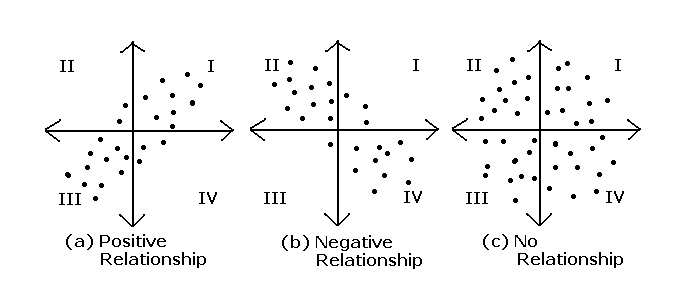

> 참고하면 좋은 사이트 [링크](https://datalabbit.tistory.com/15)

---

* yahoo 사이트가 변경됨에 따라 책처럼 데이터가 불러와지지 않음

> [참고링크](https://blog.naver.com/nackji80/222318657325)

In [40]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=8989ced659a344f4c710ea08677e58eb04d3e5cfc892242ed2f79e187be58380
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [52]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

In [50]:
yf.pdr_override()

In [55]:
all_data = {ticker: pdr.get_data_yahoo(ticker)
        for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
all_data

{'AAPL':                   Open        High  ...   Adj Close     Volume
 Date                                ...                       
 1980-12-12    0.128348    0.128906  ...    0.100751  469033600
 1980-12-15    0.122210    0.122210  ...    0.095495  175884800
 1980-12-16    0.113281    0.113281  ...    0.088485  105728000
 1980-12-17    0.115513    0.116071  ...    0.090676   86441600
 1980-12-18    0.118862    0.119420  ...    0.093304   73449600
 ...                ...         ...  ...         ...        ...
 2021-07-20  143.460007  147.100006  ...  146.149994   96350000
 2021-07-21  145.529999  146.130005  ...  145.399994   74993500
 2021-07-22  145.940002  148.199997  ...  146.800003   77338200
 2021-07-23  147.550003  148.720001  ...  148.559998   71361600
 2021-07-26  148.270004  149.830002  ...  148.990005   72434089
 
 [10241 rows x 6 columns],
 'GOOG':                    Open         High  ...    Adj Close    Volume
 Date                                  ...               

* 각 주식의 퍼센트 변화율을 계산해보자!

In [58]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-07-20,0.025974,0.014864,0.008339,0.014294
2021-07-21,-0.005132,0.009502,0.007447,0.011434
2021-07-22,0.009629,-0.004175,0.016844,0.005490
2021-07-23,0.011989,0.004477,0.012337,0.033657
2021-07-26,0.002895,0.010118,-0.002140,0.013268


* `corr`메서드는 NA가 아니며 정렬된 색인에서 연속하는 두 `Sries`에 대해 상관관계를 계산한다.


* `cov` 메서드는 공분산을 계산한다.

In [59]:
returns['MSFT'].corr(returns['IBM'])

0.4492173667925606

In [60]:
returns['MSFT'].cov(returns['IBM'])

0.00016661971480077322

In [61]:
returns.MSFT.corr(returns.IBM)

0.4492173667925606

* 상관행렬 출력

In [65]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.369436,0.419929,0.499142
IBM,0.369436,1.000000,0.449217,0.415863
MSFT,0.419929,0.449217,1.000000,0.533706
GOOG,0.499142,0.415863,0.533706,1.000000


* 공분산행렬 출력

In [66]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000814,0.000178,0.000249,0.000201
IBM,0.000178,0.000254,0.000167,0.000115
MSFT,0.000249,0.000167,0.000458,0.000174
GOOG,0.000201,0.000115,0.000174,0.000367


* `corrwith` 메서드를 사용하면 다른 `Series`나 `DataFrame`과의 상관관계를 계산한다.

* `Series`를 넘긴 경우

In [67]:
returns.corrwith(returns.IBM)

AAPL    0.369436
IBM     1.000000
MSFT    0.449217
GOOG    0.415863
dtype: float64

* `DataFrame`을 넘긴 경우

In [69]:
returns.corrwith(volume)

AAPL   -0.000227
IBM    -0.009096
MSFT   -0.007135
GOOG    0.038007
dtype: float64

* `axis='colums'` 옵션을 넘기면 각 컬럼에 대한 상관관계와 공분산을 계산한다.

In [ ]:
returns.corrwith(returns.IBM, axis='columns')

---

# 5.3.2 유일값, 값 세기, 멤버십

In [71]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

* `unique`메서드는 중복되는 값을 제거하고 유일값만 담고 있는 `Series`를 반환한다.

In [76]:
uniques = obj.unique()

print(uniques)

['c' 'a' 'd' 'b']


---

* 유일값은 정렬된 순서대로 반환되지 않지만 필요하다면<br>
`uniques.sort()`를 이용해서 나중에 정렬할 수 있다.<br>
그리고 `value_counts`메서드는 `Series`에서 도수를 계산하여 반환한다.

In [81]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

* `value_counts`메서드는 Pandas의 최상위 메서드로 어떤 배열이나 순차 자료구조에서도 사용 가능하다.

In [82]:
pd.value_counts(obj.values, sort=False)

c    3
b    2
a    3
d    1
dtype: int64

In [83]:
pd.value_counts(obj.values, sort=True)

a    3
c    3
b    2
d    1
dtype: int64

* `isin`메서드는 어떤 값이 Series에 존재하는지 나타내는 불리언 벡터를 반환한다.<br><br>
Series나 DataFrame의 컬럼에서 값을 골라내고 싶을 때 유용하게 사용할 수 있다.

In [85]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [87]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [88]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

* `isin`과 관련이 있는 `Index.get_indexer`메서드는 여러 값이 들어 있는 배열에서 유일한 값의 색인 배열을 구할 수 있다.

In [90]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

unique_vals = pd.Series(['c', 'b', 'a']) # c가 0, a가 2, b가 1

In [92]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

|메서드|설명|
|---|---|
|`isin`|Series의 각 원소가 넘겨받은 연속된 값에 속하는지 나타내는 불리언 배열을 반환한다.|
|`match`|각 값에 대해 유일한 값을 담고 있는 배열에서의 정수 색인을 계산한다. 데이터 정렬이나 조인 형태의 연산을 하는 경우에 유용하다.|
|`value_counts`|Series에서 유일값에 대한 색인과 도수를 계산한다.  도수는 내림차순으로 정렬된다.|
|`unique`|Series에서 중복되는 값을 제거하고 유일값만 포함하는 배열을 반환한다.|

In [93]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

In [94]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


* DataFrmae의 `apply`함수에 `pandas.value_counts`를 넘기면 다음과 같은 결과를 얻을 수 있다.

In [101]:
result = data.apply(pd.value_counts).fillna(0)
print(result, '\n', type(result))

   Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0 
 <class 'pandas.core.frame.DataFrame'>


- 여기서 결과값의 로우 라벨은 전체 컬럼의 유일한 값들을 담고 있다.<br>
각 값은 각 컬럼에서 해당 값이 몇 번 출현했는지 나타낸다.